# Digit Recognition

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Visualizing samples From Data

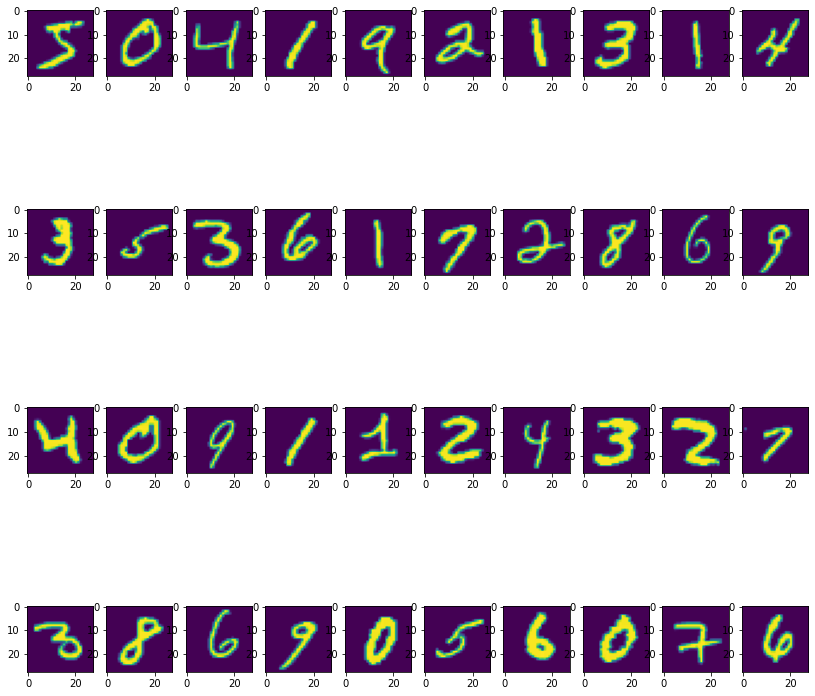

In [4]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

In [5]:
batch_size = 128 
num_classes = 10 
epochs = 20

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Creating Model.

In [7]:
model = Sequential() 

In [8]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

## Visualizing Model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [10]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

## Traning Model

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 13s 11ms/step - loss: 33.9083 - accuracy: 0.1443 - val_loss: 5.1027 - val_accuracy: 0.3859
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 14.4067 - accuracy: 0.2582 - val_loss: 2.1858 - val_accuracy: 0.5662
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 7.4185 - accuracy: 0.3312 - val_loss: 1.3548 - val_accuracy: 0.6099
Epoch 4/20
469/469 [==============================] - 4s 10ms/step - loss: 4.3589 - accuracy: 0.3563 - val_loss: 1.3353 - val_accuracy: 0.5738
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 3.0113 - accuracy: 0.3574 - val_loss: 1.5323 - val_accuracy: 0.5378
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 2.4324 - accuracy: 0.3627 - val_loss: 1.6499 - val_accuracy: 0.5170
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 2.1869 - accuracy: 0.3711 - val_loss: 1.6772 - val_accuracy: 0.5191
E

In [12]:
# save model
model.save('save_models/mnist_model.h5')

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.8979984521865845
Test Accuracy: 0.7836999893188477


## Test Operation for Random Value

In [14]:
model_test = model.save('save_models/mnist_model.h5')

In [15]:
test_image = x_test[1289]
y_test[1289]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

* 1 has chosen the assigned value.

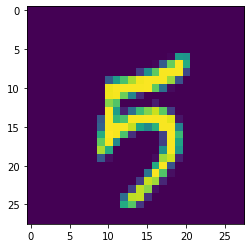

In [16]:
plt.imshow(test_image.reshape(28,28))

In [ ]:
test_data = x_test[1289].reshape(1,28,28,1)
pre = model.predict(test_data, batch_size=1)

In [18]:
preds = model.predict(test_data)
prob = model.predict(test_data)
print(preds, prob)

1/1 [==============================] - 0s 19ms/step
[[0.09982681 0.0994302  0.100044   0.1004158  0.10021941 0.10050885
  0.09948123 0.09941272 0.10079407 0.09986691]] [[0.09982681 0.0994302  0.100044   0.1004158  0.10021941 0.10050885
  0.09948123 0.09941272 0.10079407 0.09986691]]
